In [104]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [48]:
df = pd.read_csv("../fetcher/Kalimati/data/csv/data.csv", parse_dates=["Date"])
df.head()

,Date,Commodity,Unit,Minimum,Maximum,Average
0,2013-06-16,Tomato Big(Nepali),Kg,35.0,40.0,37.5
1,2013-06-16,Tomato Small(Local),Kg,26.0,32.0,29.0
2,2013-06-16,Potato Red,Kg,20.0,21.0,20.5
3,2013-06-16,Potato White,Kg,15.0,16.0,15.5
4,2013-06-16,Onion Dry (Indian),Kg,28.0,30.0,29.0


In [49]:
df.tail()

,Date,Commodity,Unit,Minimum,Maximum,Average
351610,2025-09-02,Fish Fresh(Bachuwa),KG,260.0,280.0,270.0
351611,2025-09-02,Fish Fresh(Chhadi),KG,230.0,250.0,240.0
351612,2025-09-02,Tree Tomato,Kg,200.0,220.0,205.0
351613,2025-09-02,King Oyster,Kg,280.0,300.0,290.0
351614,2025-09-02,Lentinula Edodes,Kg,900.0,1000.0,950.0


In [56]:
actual_data = df[df.Date == "2025-09-02"]

In [57]:
len(actual_data)

99

In [58]:
prediction_data = pd.read_csv("../data/predictions.csv")
prediction_data.head()

,Commodity,Predicted_Price_1days,Predicted_Selling_Price_1days,Predicted_Price_7days,Predicted_Selling_Price_7days,Predicted_Price_15days,Predicted_Selling_Price_15days,Predicted_Price_30days,Predicted_Selling_Price_30days
0,Tomato Big(Nepali),63.07,75.68,59.06,70.87,57.42,68.90,56.83,68.19
1,Tomato Small(Local),43.94,52.72,43.30,51.96,45.17,54.20,52.78,63.33
2,Potato Red,65.76,78.91,69.30,83.16,72.82,87.38,77.70,93.24
3,Potato White,50.11,60.13,51.89,62.27,52.73,63.28,52.08,62.50
4,Onion Dry (Indian),82.31,98.77,85.42,102.51,91.77,110.12,106.83,128.20


In [63]:
merged_df = pd.merge(
    actual_data[["Commodity", "Average"]], 
    prediction_data[["Commodity", "Predicted_Price_1days"]],
    on="Commodity",
    how="inner"
)

In [64]:
merged_df

,Commodity,Average,Predicted_Price_1days
0,Tomato Big(Nepali),68.0,63.07
1,Tomato Big(Indian),78.0,71.27
2,Tomato Small(Local),23.2,43.94
3,Tomato Small(Tunnel),31.0,47.21
4,Potato Red,51.0,65.76
...,...,...,...
94,Fish Fresh(Bachuwa),270.0,296.44
95,Fish Fresh(Chhadi),240.0,242.22
96,Tree Tomato,205.0,190.39
97,King Oyster,290.0,288.23


In [65]:
merged_df = merged_df.rename(
    columns={
        "Average": "Actual Price",
        "Predicted_Price_1days": "Predicted Price"
    }
)

In [112]:
merged_df["Difference"] = merged_df["Predicted Price"] - merged_df["Actual Price"]
merged_df["Difference"] = merged_df["Difference"].round(2)

In [113]:
merged_df["Difference_Percentage"] = ((merged_df["Predicted Price"] - merged_df["Actual Price"]) 
                             / merged_df["Actual Price"]) * 100


In [114]:
merged_df["Difference_Percentage"] = merged_df["Difference_Percentage"].round(2)

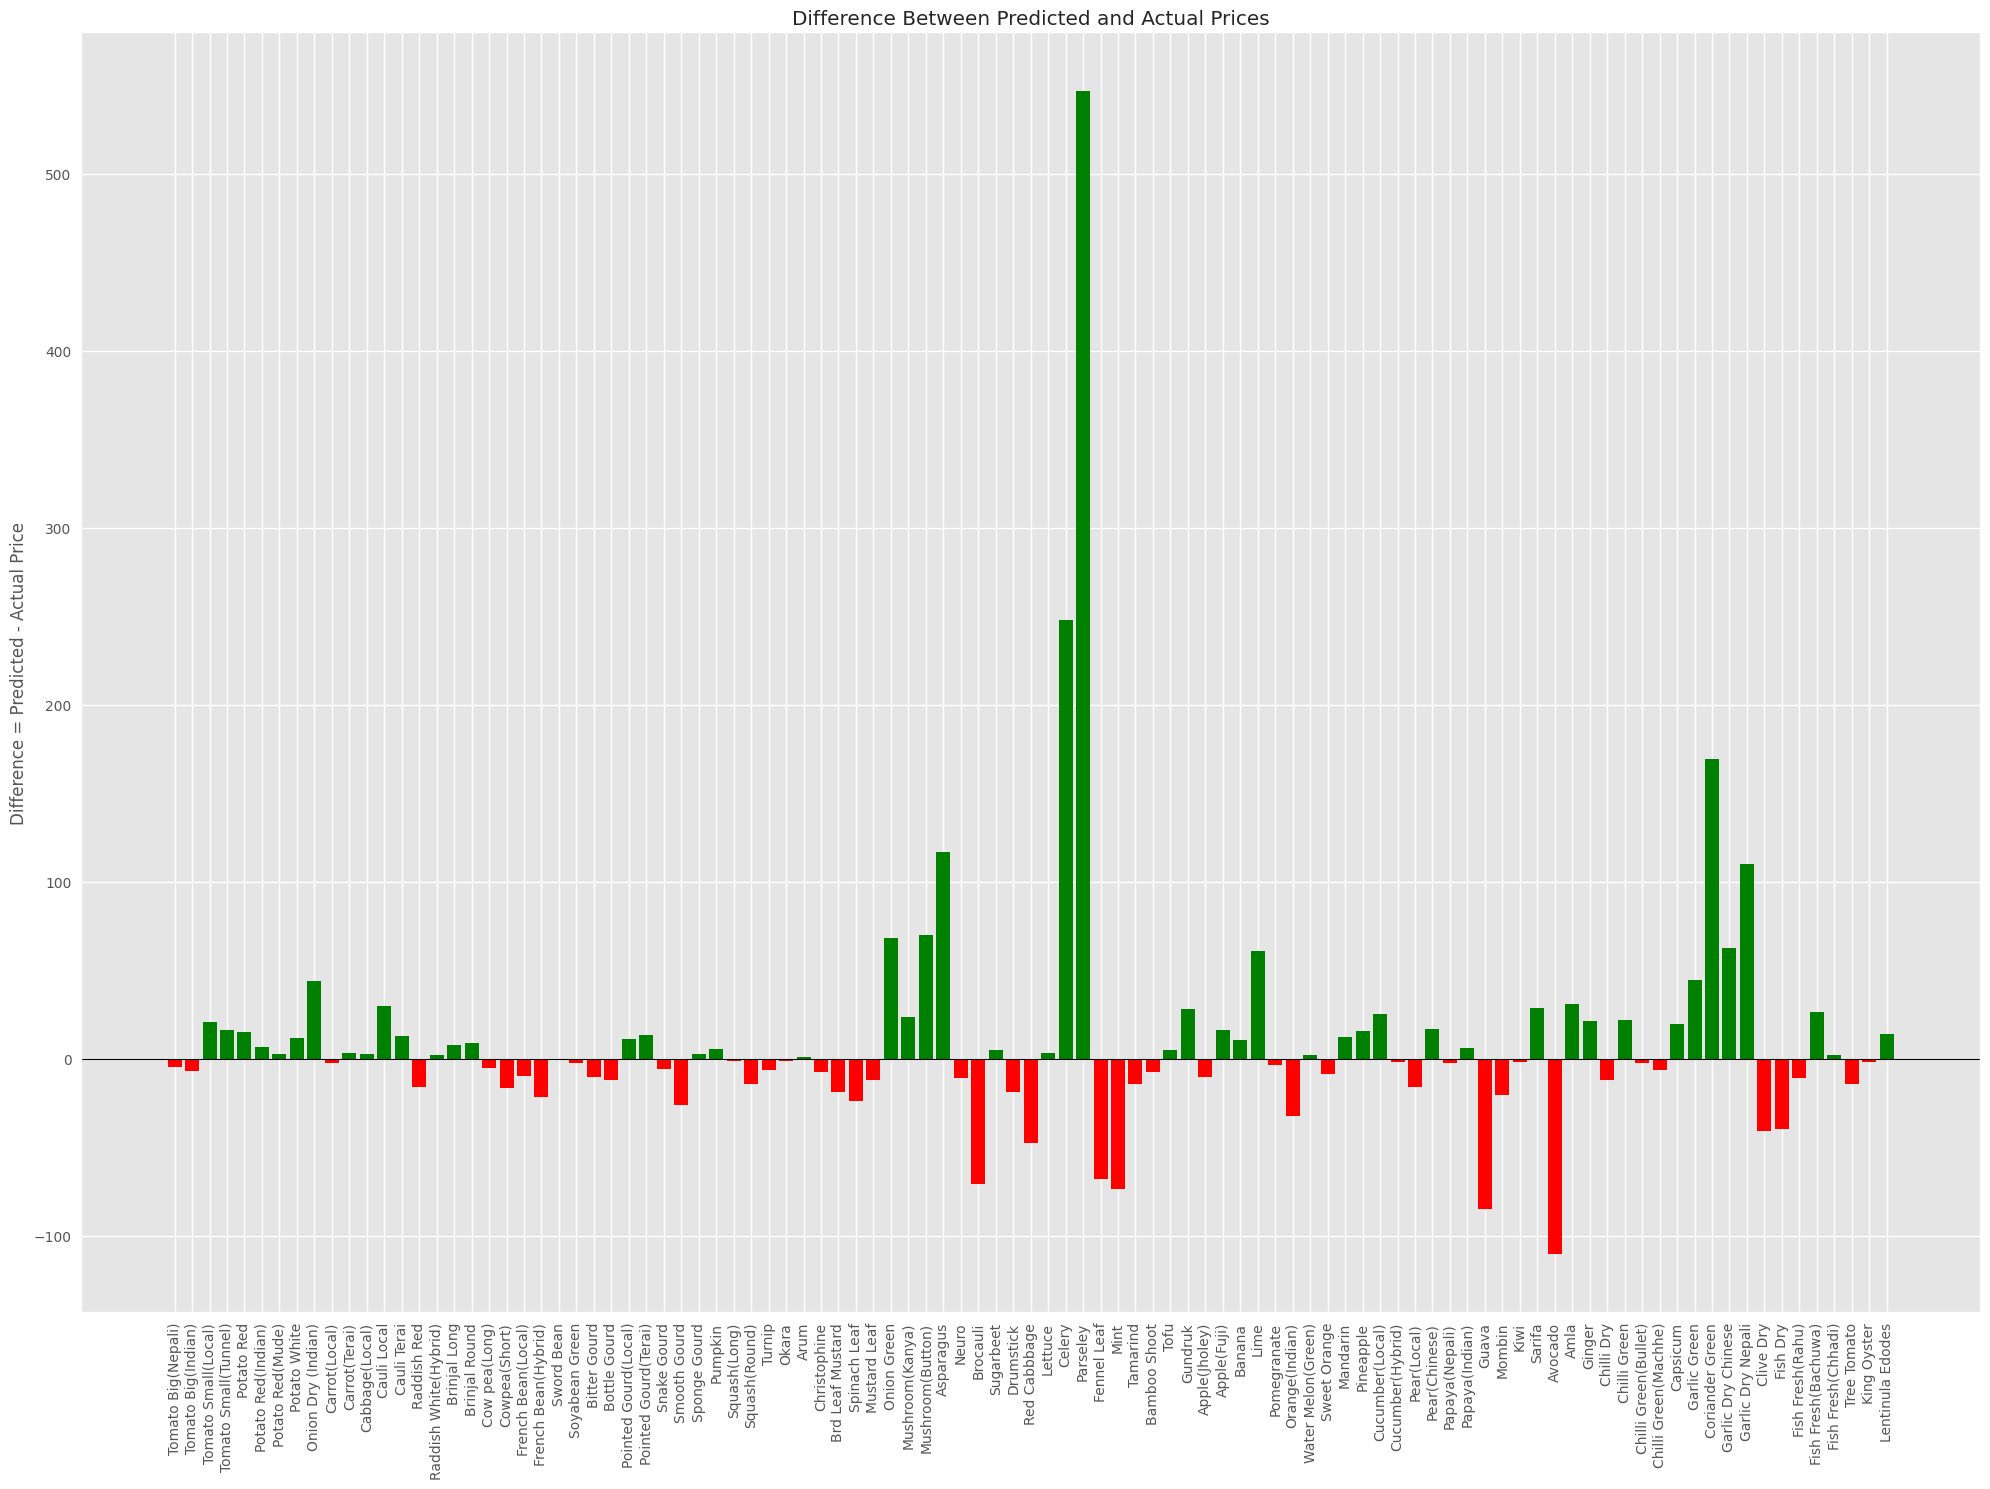

In [115]:
colors = merged_df["Difference"].apply(lambda x: "green" if x >= 0 else "red")

plt.figure(figsize=(20, 15))
bars = plt.bar(merged_df["Commodity"], merged_df["Difference"], color=colors)
plt.axhline(0, color="black", linewidth=0.8)

# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, height,
#              f'{height:.1f}', ha='center', va='bottom', fontsize=5)

plt.ylabel("Difference = Predicted - Actual Price")
plt.title("Difference Between Predicted and Actual Prices")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

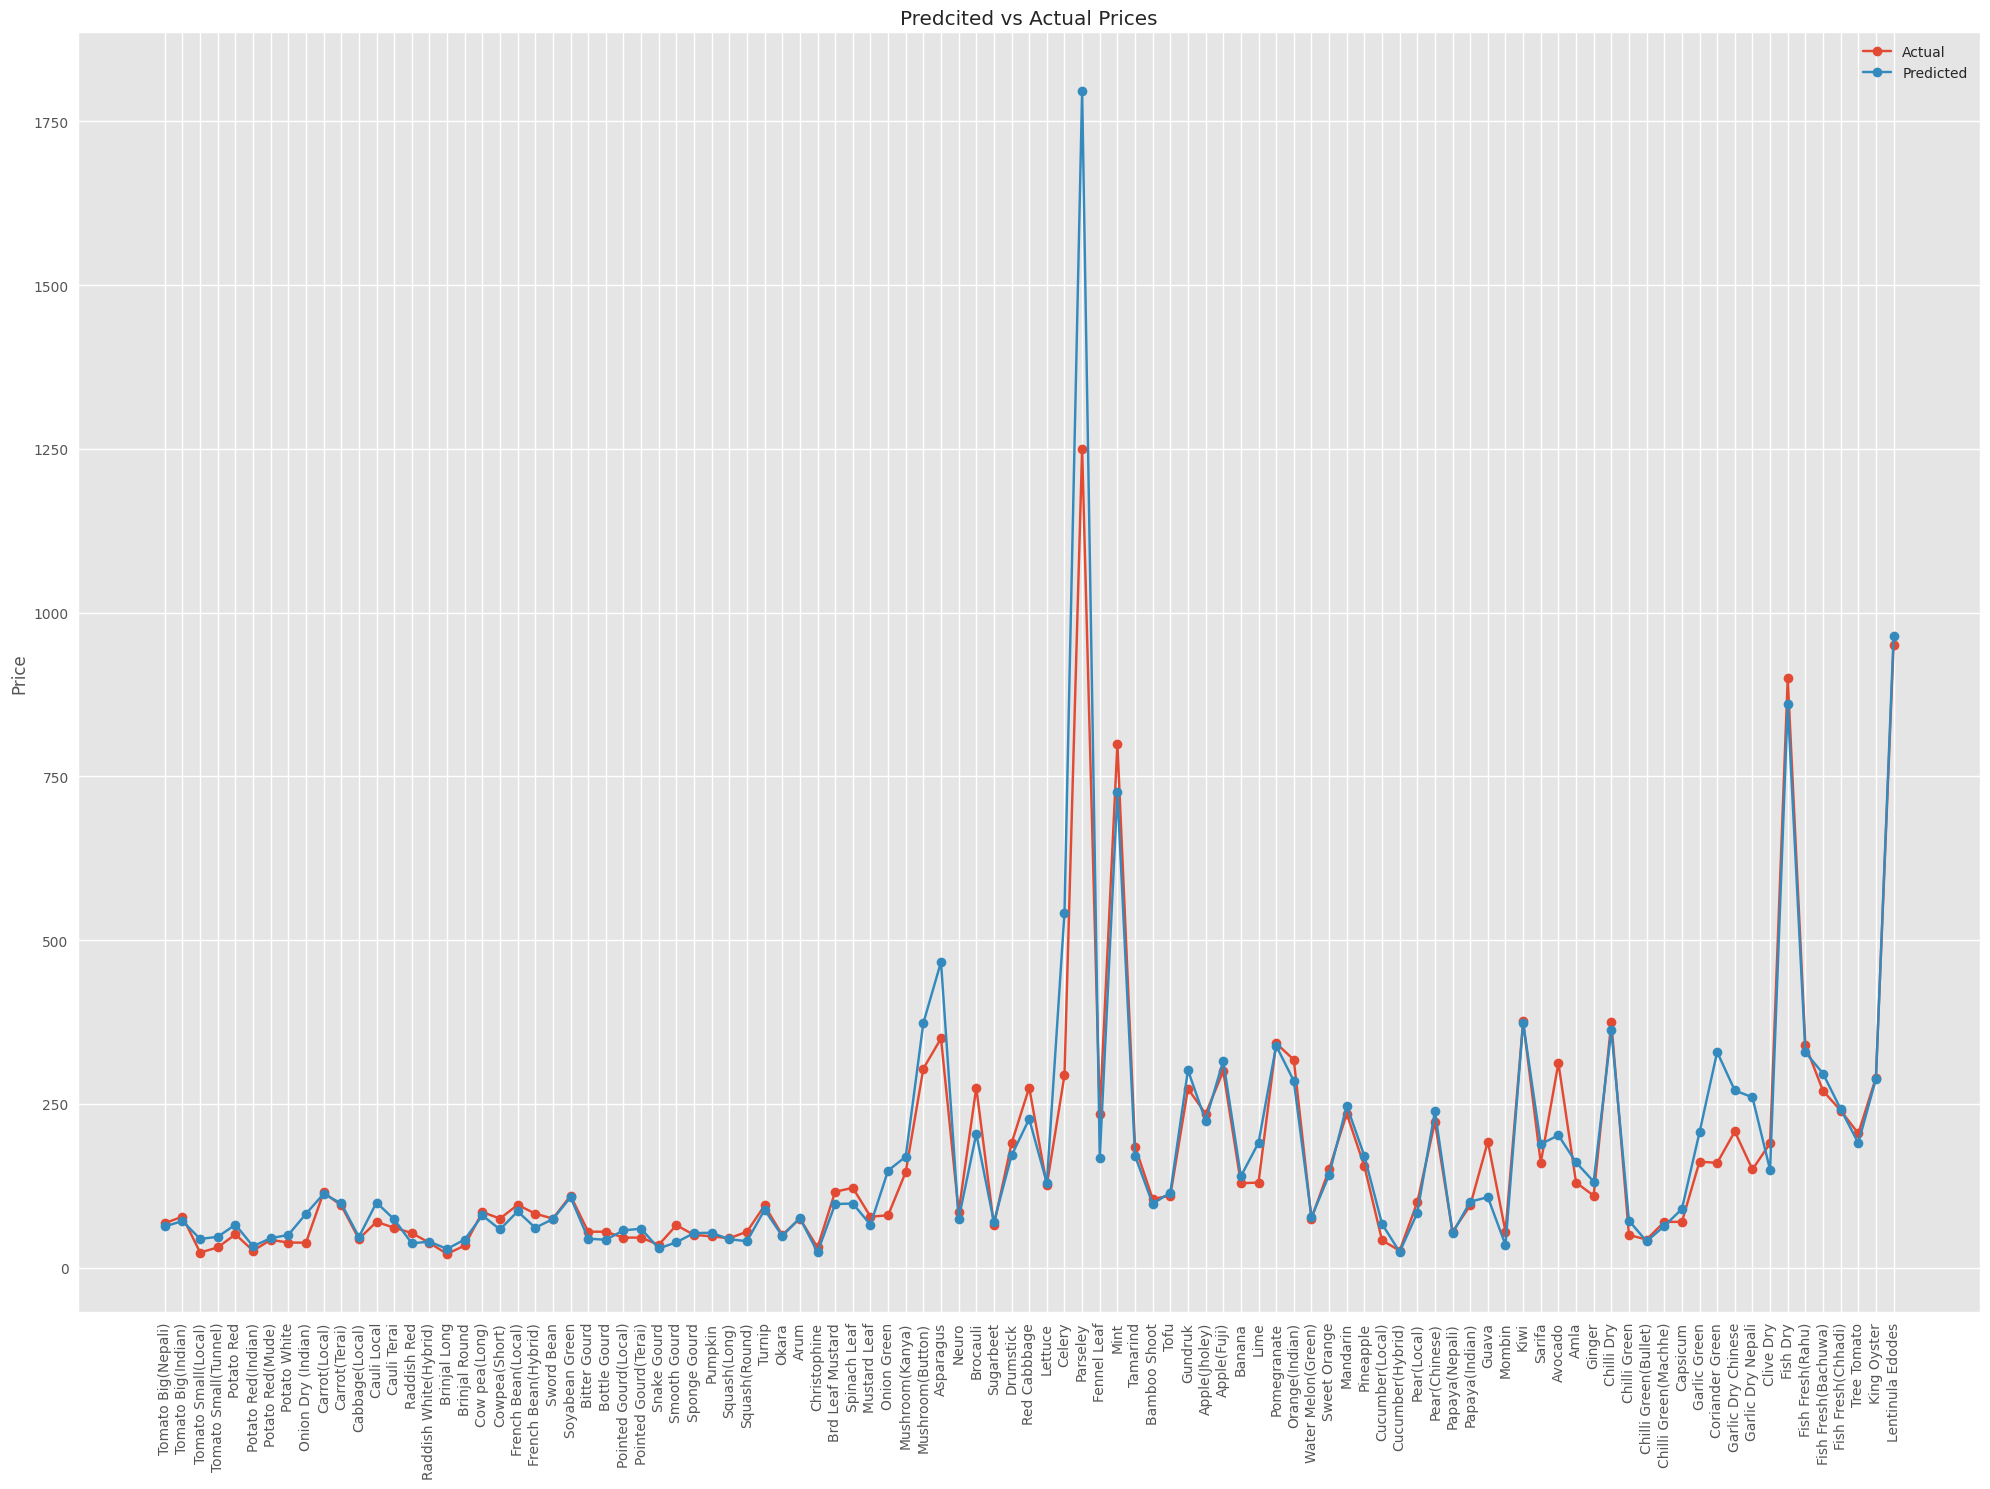

In [116]:
plt.figure(figsize=(20, 15))
plt.plot(merged_df["Commodity"], merged_df["Actual Price"], marker='o', label='Actual')
plt.plot(merged_df["Commodity"], merged_df["Predicted Price"], marker='o', label='Predicted')
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.title("Predcited vs Actual Prices")
plt.legend()
plt.tight_layout()
plt.show()


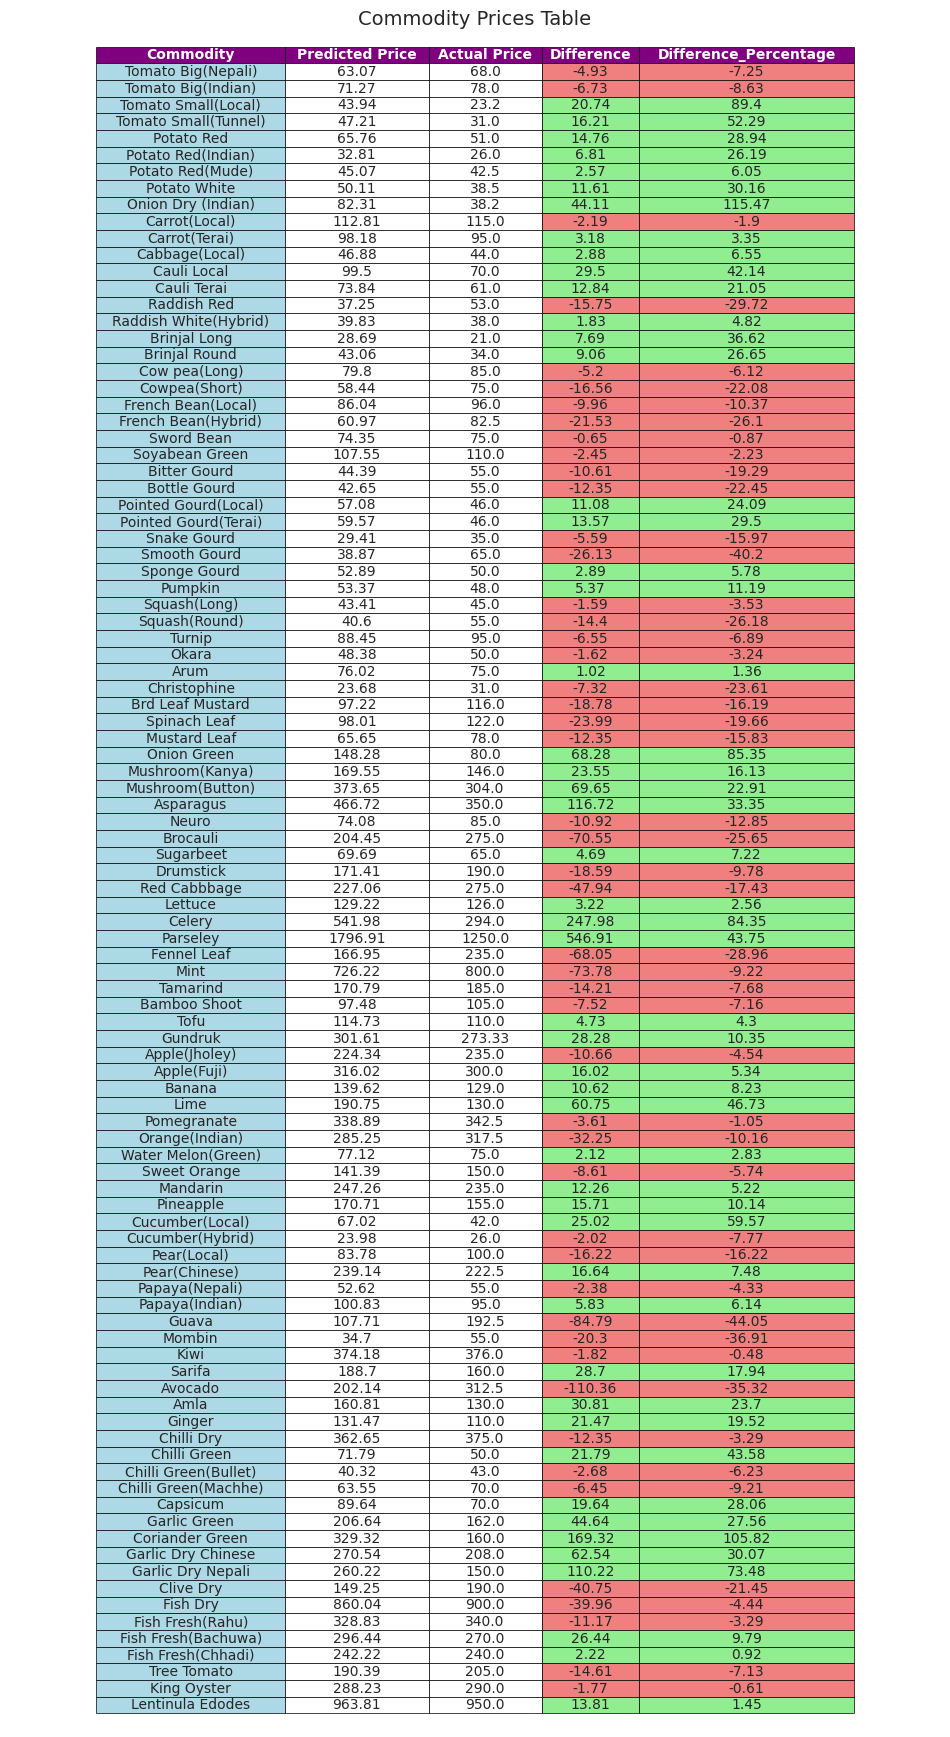

In [127]:
fig, ax = plt.subplots(figsize=(12, 22))
ax.axis('off')

table_data = merged_df[["Commodity", "Predicted Price", "Actual Price", "Difference", "Difference_Percentage"]]


table = ax.table(cellText=table_data.values,
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(table_data.columns))))

for (i, j), cell in table.get_celld().items():

    if i == 0:
        cell.set_facecolor("purple")
        cell.set_text_props(weight='bold', color='white')
    else:
        if j == 0:
            cell.set_facecolor("lightblue")

        elif j == 3:  # "Difference"
            value = table_data.iloc[i-1, j]
            cell.set_facecolor("lightgreen" if value >= 0 else "lightcoral")

        elif j == 4:
            value = table_data.iloc[i-1, j]
            cell.set_facecolor("lightgreen" if value >= 0 else "lightcoral")

plt.title("Commodity Prices Table", fontsize=14)
plt.show()